Q.1 Prepare/Pre-process a text corpus to make it more usable for NLP tasks using
tokenization, filtration of stop words, removal of punctuation, stemming and
lemmatization.

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Added to resolve LookupError

text = "Natural Language Processing (NLP) is used to make computers understand human language!"

# 1. Tokenization
tokens = word_tokenize(text)

# 2. Remove punctuation
tokens = [word for word in tokens if word not in string.punctuation]

# 3. Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# 4. Stemming
stemmer = PorterStemmer()
stemmed = [stemmer.stem(word) for word in filtered_tokens]

# 5. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_tokens]

print("Original:", text)
print("Tokens:", tokens)
print("After Stop-word Removal:", filtered_tokens)
print("Stemming:", stemmed)
print("Lemmatization:", lemmatized)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Original: Natural Language Processing (NLP) is used to make computers understand human language!
Tokens: ['Natural', 'Language', 'Processing', 'NLP', 'is', 'used', 'to', 'make', 'computers', 'understand', 'human', 'language']
After Stop-word Removal: ['Natural', 'Language', 'Processing', 'NLP', 'used', 'make', 'computers', 'understand', 'human', 'language']
Stemming: ['natur', 'languag', 'process', 'nlp', 'use', 'make', 'comput', 'understand', 'human', 'languag']
Lemmatization: ['Natural', 'Language', 'Processing', 'NLP', 'used', 'make', 'computer', 'understand', 'human', 'language']


Q2. List the most common words (with the frequency) in a given text excluding stopwords

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')

text = """
Natural Language Processing enables computers to analyze, understand, and generate human language.
Language models learn patterns from large text datasets.
"""

# 1. Tokenize the text
tokens = word_tokenize(text.lower())

# 2. Remove punctuation
tokens = [word for word in tokens if word not in string.punctuation]

# 3. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# 4. Count word frequency
word_freq = Counter(filtered_tokens)

# 5. Print most common words
print("Most common words (excluding stopwords):")
for word, freq in word_freq.most_common():
    print(f"{word}: {freq}")


Most common words (excluding stopwords):
language: 3
natural: 1
processing: 1
enables: 1
computers: 1
analyze: 1
understand: 1
generate: 1
human: 1
models: 1
learn: 1
patterns: 1
large: 1
text: 1
datasets: 1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Q.3 Extract the usernames from the email addresses present in a given text. .

In [5]:
import re

text = """
Please contact john.doe123@gmail.com for details.
You can also write to support_team@company.org or admin@mysite.in for assistance.
"""

# Regex to match email addresses
emails = re.findall(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', text)

# Extract usernames (before '@')
usernames = [email.split('@')[0] for email in emails]

print("Extracted Usernames:")
for u in usernames:
    print(u)


Extracted Usernames:
john.doe123
support_team
admin


Q.4 Perform POS tagging in a given text file. Extract all the nouns present in the text. Create and print a dictionary with frequency of parts of speech present in the document. Find the similarity between any two text documents

In [6]:
import spacy
from collections import Counter

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Load your text documents
with open("/content/drive/MyDrive/Colab Notebooks/doc1.txt", "r", encoding="utf-8") as f:
    text1 = f.read()

with open("/content/drive/MyDrive/Colab Notebooks/doc2.txt", "r", encoding="utf-8") as f:
    text2 = f.read()

# Process the text using spaCy (POS Tagging)
doc1 = nlp(text1)
doc2 = nlp(text2)

# Extract nouns from both documents
nouns_doc1 = [token.text for token in doc1 if token.pos_ == "NOUN"]
nouns_doc2 = [token.text for token in doc2 if token.pos_ == "NOUN"]

print("Nouns in Document 1:", nouns_doc1)
print("Nouns in Document 2:", nouns_doc2)

# POS frequency dictionary
pos_freq_doc1 = Counter([token.pos_ for token in doc1])
pos_freq_doc2 = Counter([token.pos_ for token in doc2])

print("POS Frequency in Document 1:", dict(pos_freq_doc1))
print("POS Frequency in Document 2:", dict(pos_freq_doc2))

# Similarity between documents
similarity = doc1.similarity(doc2)
print(f"Similarity between documents: {similarity:.3f}")


Nouns in Document 1: ['document', 'Data', 'visualization', 'tomorrow', 'libraries', 'language']
Nouns in Document 2: ['document', 'Tomorrow', 'data', 'analysis', 'visualization', 'viva', 'Spacy', 'text', 'analysis']
POS Frequency in Document 1: {'PRON': 1, 'AUX': 4, 'NOUN': 6, 'NUM': 1, 'PUNCT': 4, 'ADJ': 1, 'PROPN': 3, 'CCONJ': 1, 'DET': 1}
POS Frequency in Document 2: {'PRON': 1, 'AUX': 2, 'NOUN': 9, 'NUM': 1, 'PUNCT': 4, 'CCONJ': 1, 'VERB': 2, 'PROPN': 1}
Similarity between documents: 0.861


/tmp/ipython-input-3818034456.py:33: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = doc1.similarity(doc2)


Q.5 Perform dependency analysis of a text file and print the root word of every sentence

In [7]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Create a dummy text file for demonstration
with open("text1.txt", "w", encoding="utf-8") as f:
    f.write("The quick brown fox jumps over the lazy dog. Natural Language Processing is fascinating.")

# Read text file
with open("text1.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Process text
doc = nlp(text)

print("Dependency Analysis – Root Word of Each Sentence:\n")

for sent in doc.sents:
    # Extract root token of the sentence
    root_word = sent.root.text
    print(f"Sentence: {sent.text.strip()}")
    print(f"Root Word: {root_word}")
    print("-" * 60)


Dependency Analysis – Root Word of Each Sentence:

Sentence: The quick brown fox jumps over the lazy dog.
Root Word: jumps
------------------------------------------------------------
Sentence: Natural Language Processing is fascinating.
Root Word: is
------------------------------------------------------------


Q6. Create the TF-IDF (Term Frequency-Inverse Document Frequency) Matrix for the
given set of text documents

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Example input documents (replace these with your own)
documents = [
    "Natural Language Processing enables machines to understand text.",
    "Machine learning models learn patterns from data.",
    "Deep learning is a subset of machine learning."
]

# Create TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Generate TF-IDF Matrix
tfidf_matrix = vectorizer.fit_transform(documents)

# Convert to a DataFrame for better readability
df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print("TF-IDF Matrix:\n")
print(df)


TF-IDF Matrix:

       data      deep   enables      from        is  language     learn  \
0  0.000000  0.000000  0.353553  0.000000  0.000000  0.353553  0.000000   
1  0.403016  0.000000  0.000000  0.403016  0.000000  0.000000  0.403016   
2  0.000000  0.380914  0.000000  0.000000  0.380914  0.000000  0.000000   

   learning   machine  machines    models   natural        of  patterns  \
0  0.000000  0.000000  0.353553  0.000000  0.353553  0.000000  0.000000   
1  0.306504  0.306504  0.000000  0.403016  0.000000  0.000000  0.403016   
2  0.579391  0.289695  0.000000  0.000000  0.000000  0.380914  0.000000   

   processing    subset      text        to  understand  
0    0.353553  0.000000  0.353553  0.353553    0.353553  
1    0.000000  0.000000  0.000000  0.000000    0.000000  
2    0.000000  0.380914  0.000000  0.000000    0.000000  


Q7. Extract all bigrams, tigrams using ngrams of nltk library

In [9]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

# Download tokenizer
nltk.download('punkt')

text = "Natural Language Processing enables machines to understand human language."

# Tokenize the text
tokens = word_tokenize(text.lower())

# Extract bigrams
bigrams = list(ngrams(tokens, 2))

# Extract trigrams
trigrams = list(ngrams(tokens, 3))

print("Bigrams:")
print(bigrams)

print("\nTrigrams:")
print(trigrams)


Bigrams:
[('natural', 'language'), ('language', 'processing'), ('processing', 'enables'), ('enables', 'machines'), ('machines', 'to'), ('to', 'understand'), ('understand', 'human'), ('human', 'language'), ('language', '.')]

Trigrams:
[('natural', 'language', 'processing'), ('language', 'processing', 'enables'), ('processing', 'enables', 'machines'), ('enables', 'machines', 'to'), ('machines', 'to', 'understand'), ('to', 'understand', 'human'), ('understand', 'human', 'language'), ('human', 'language', '.')]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Q.8 Identify and print the named entities using Name Entity Recognition (NER) for a collection of news headlines.

In [10]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Sample collection of news headlines (replace with your dataset)
headlines = [
    "Apple launches new iPhone in California",
    "Prime Minister Narendra Modi meets US President at White House",
    "Google invests $1 billion in India",
    "Hurricane Ian destroys large areas of Florida",
    "ISRO successfully launches Chandrayaan mission"
]

print("Named Entities in News Headlines:\n")

for idx, headline in enumerate(headlines, start=1):
    doc = nlp(headline)
    print(f"Headline {idx}: {headline}")

    for ent in doc.ents:
        print(f"   {ent.text}  -->  {ent.label_}")

    print("-" * 60)


Named Entities in News Headlines:

Headline 1: Apple launches new iPhone in California
   Apple  -->  ORG
   iPhone  -->  ORG
   California  -->  GPE
------------------------------------------------------------
Headline 2: Prime Minister Narendra Modi meets US President at White House
   Narendra Modi  -->  PERSON
   US  -->  GPE
   White House  -->  ORG
------------------------------------------------------------
Headline 3: Google invests $1 billion in India
   $1 billion  -->  MONEY
   India  -->  GPE
------------------------------------------------------------
Headline 4: Hurricane Ian destroys large areas of Florida
   Hurricane Ian  -->  ORG
   Florida  -->  GPE
------------------------------------------------------------
Headline 5: ISRO successfully launches Chandrayaan mission
   Chandrayaan  -->  PERSON
------------------------------------------------------------


Q.9 Find the latent topics in a document using any LDA and display top 5 terms that contribute to each topic along with their strength. Also visualize the distribution of terms contributing to the topics.


TOPICS AND THEIR TOP TERMS:

Topic 1:
   learning         Strength: 2.4969
   vision           Strength: 1.4972
   tasks            Strength: 1.4972
   used             Strength: 1.4972
   deep             Strength: 1.4972

Topic 2:
   language         Strength: 2.4977
   understand       Strength: 1.4978
   processing       Strength: 1.4978
   natural          Strength: 1.4978
   human            Strength: 1.4978



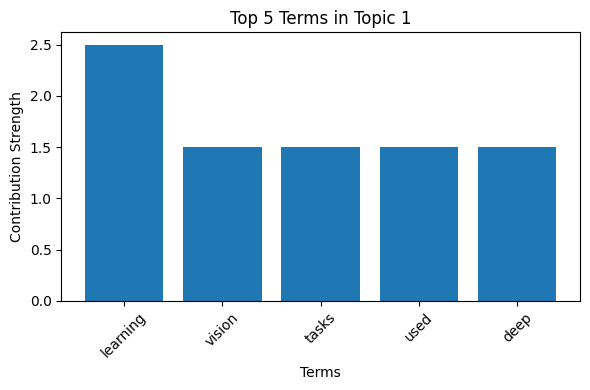

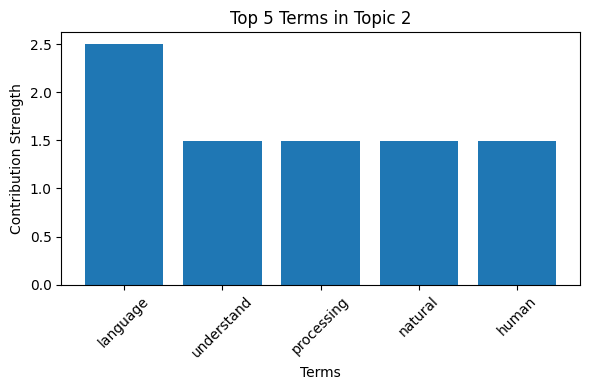

In [12]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# ------------------------------------------------
# 1. LOAD DOCUMENTS
# ------------------------------------------------
# Replace these with your own documents
documents = [
    "Natural language processing enables computers to understand human language.",
    "Deep learning models are widely used in computer vision and NLP tasks.",
    "Machine learning provides systems the ability to learn and improve from data.",
    "Neural networks consist of layers that extract features from raw input.",
    "Artificial intelligence is transforming industries through automation."
]

# ------------------------------------------------
# 2. TEXT VECTORIZATION (Bag of Words)
# ------------------------------------------------
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

# ------------------------------------------------
# 3. APPLY LDA
# ------------------------------------------------
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# ------------------------------------------------
# 4. PRINT TOP 5 TERMS PER TOPIC
# ------------------------------------------------
print("\nTOPICS AND THEIR TOP TERMS:\n")
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}:")
    top_indices = topic.argsort()[-5:][::-1]
    for i in top_indices:
        print(f"   {feature_names[i]:<15}  Strength: {topic[i]:.4f}")
    print()

# ------------------------------------------------
# 5. VISUALIZE TERM CONTRIBUTIONS
# ------------------------------------------------
for idx, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-5:][::-1]
    top_terms = [feature_names[i] for i in top_indices]
    top_values = topic[top_indices]

    plt.figure(figsize=(6, 4))
    plt.bar(top_terms, top_values)
    plt.title(f"Top 5 Terms in Topic {idx+1}")
    plt.xlabel("Terms")
    plt.ylabel("Contribution Strength")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Q. 10 Classify movie reviews as positive or negative from the IMDB movie dataset of
50K movie reviews. (Link for dataset:
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-revie
ws )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Accuracy: 0.8915

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



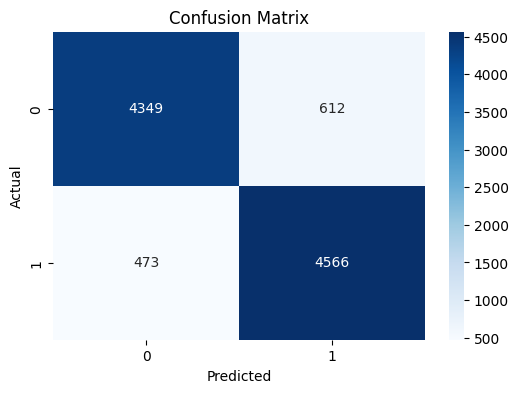

Review: The movie was fantastic, I enjoyed every moment!
→ Predicted Sentiment: Positive



In [13]:
# ============================
# IMDB MOVIE REVIEW CLASSIFIER
# ============================


# Import libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub # Import kagglehub
import os # Import os for path manipulation

# --------------------------------
# 1. LOAD DATASET
# --------------------------------
# Download the dataset
# This returns the path to the root directory where the dataset is downloaded
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv", engine='python')

# --------------------------------
# 2. TEXT CLEANING FUNCTION
# --------------------------------
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)              # remove HTML
    text = re.sub(r"[^a-zA-Z]", " ", text)         # keep only letters
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df["clean_review"] = df["review"].apply(clean_text)

# --------------------------------
# 3. LABEL ENCODING
# --------------------------------
df["label"] = df["sentiment"].map({"positive": 1, "negative": 0})

# --------------------------------
# 4. TRAIN-TEST SPLIT
# --------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_review"], df["label"], test_size=0.2, random_state=42
)

# --------------------------------
# 5. TF-IDF VECTORIZATION
# --------------------------------
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# --------------------------------
# 6. TRAIN MODEL (LOGISTIC REGRESSION)
# --------------------------------
model = LogisticRegression(max_iter=300)
model.fit(X_train_tfidf, y_train)

# --------------------------------
# 7. EVALUATION
# --------------------------------
y_pred = model.predict(X_test_tfidf)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --------------------------------
# 8. PREDICT CUSTOM REVIEW
# --------------------------------
def predict_sentiment(review):
    cleaned = clean_text(review)
    vec = tfidf.transform([cleaned])
    pred = model.predict(vec)[0]
    return "Positive" if pred == 1 else "Negative"

# Example prediction
sample = "The movie was fantastic, I enjoyed every moment!"
sample_tfidf = tfidf.transform([sample])
predictions = model.predict(sample_tfidf)

sentiment = "Positive" if predictions[0] == 1 else "Negative"
print(f"Review: {sample}\n→ Predicted Sentiment: {sentiment}\n")

Q.11 Build and train a text classifier for the given data (using textbob or
simpletransformers library)

In [15]:
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
import pandas as pd
import random

# ------------------------------
# Load your dataset
# ------------------------------
# Your CSV must have 2 columns: "text" and "label"
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/text_classification_dataset.csv")

# Convert to list of tuples → (text, label)
data = list(zip(df["text"], df["label"]))

# Shuffle & split
random.shuffle(data)
train_data = data[:int(0.8 * len(data))]
test_data = data[int(0.8 * len(data)):]

# ------------------------------
# Train Model
# ------------------------------
classifier = NaiveBayesClassifier(train_data)

# ------------------------------
# Evaluate
# ------------------------------
accuracy = classifier.accuracy(test_data)
print("Accuracy:", accuracy)

# ------------------------------
# Predict custom text
# ------------------------------
sample = "This movie was fantastic!"
print("Prediction:", classifier.classify(sample))


Accuracy: 0.3333333333333333
Prediction: technology


Q. 12 Generate text using a character-based RNN using an appropriate dataset. Given a
sequence of characters from a given data (eg "Shakespear"), train a model to predict
the next character in the sequence ("e").

In [16]:
# ============================================
# Character-level RNN text generation with PyTorch
# ============================================

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import random
import math

# -------------------------
# 1) Example dataset (you can replace this with your own text)
# -------------------------

# A tiny Shakespeare-like sample; in practice use a much larger text file.
text = """
To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take arms against a sea of troubles,
And by opposing end them.
"""

# Remove leading/trailing spaces (optional)
text = text.strip()

print("Dataset length (characters):", len(text))

# -------------------------
# 2) Build character vocabulary
# -------------------------
chars = sorted(list(set(text)))
vocab_size = len(chars)

print("Unique characters:", chars)
print("Vocab size:", vocab_size)

char2idx = {ch: i for i, ch in enumerate(chars)}
idx2char = {i: ch for ch, i in char2idx.items()}

def encode(s):
    return [char2idx[c] for c in s]

def decode(ids):
    return "".join(idx2char[i] for i in ids)

# -------------------------
# 3) Create dataset of input and target sequences
# -------------------------
seq_len = 40  # length of input sequences
step = 3      # step size to slide over the text

input_seqs = []
target_seqs = []

for i in range(0, len(text) - seq_len, step):
    input_seq = text[i:i+seq_len]
    target_seq = text[i+1:i+seq_len+1]  # shifted by 1 char

    input_seqs.append(encode(input_seq))
    target_seqs.append(encode(target_seq))

print("Number of sequences:", len(input_seqs))

class CharDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        x = torch.tensor(self.inputs[idx], dtype=torch.long)
        y = torch.tensor(self.targets[idx], dtype=torch.long)
        return x, y

dataset = CharDataset(input_seqs, target_seqs)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# -------------------------
# 4) Define the RNN model (LSTM)
# -------------------------
class CharRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim=64, hidden_dim=128, num_layers=2):
        super(CharRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x, hidden=None):
        # x: (batch, seq_len)
        x = self.embed(x)  # (batch, seq_len, embed_dim)
        out, hidden = self.lstm(x, hidden)  # out: (batch, seq_len, hidden_dim)
        out = self.fc(out)  # (batch, seq_len, vocab_size)
        return out, hidden

# -------------------------
# 5) Training setup
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = CharRNN(vocab_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

# -------------------------
# 6) Training loop
# -------------------------
epochs = 30  # increase this for better results

for epoch in range(1, epochs + 1):
    model.train()
    total_loss = 0.0

    for x, y in dataloader:
        x = x.to(device)  # (batch, seq_len)
        y = y.to(device)  # (batch, seq_len)

        optimizer.zero_grad()

        # model output: (batch, seq_len, vocab_size)
        logits, _ = model(x)

        # Reshape for cross-entropy:
        # logits: (batch * seq_len, vocab_size)
        # targets: (batch * seq_len)
        loss = criterion(
            logits.view(-1, vocab_size),
            y.view(-1)
        )

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f"Epoch {epoch}/{epochs} - Loss: {avg_loss:.4f}")

# -------------------------
# 7) Text generation function
# -------------------------
def generate_text(model, start_str="To be", length=200, temperature=1.0):
    """
    temperature > 1.0  → more random
    temperature < 1.0  → more conservative
    """
    model.eval()
    chars_input = encode(start_str)
    input_seq = torch.tensor([chars_input], dtype=torch.long).to(device)
    hidden = None

    # Warm-up the model with the start_str
    with torch.no_grad():
        logits, hidden = model(input_seq, hidden)

    # Start from the last character
    last_char_id = chars_input[-1]
    generated = chars_input[:]  # copy

    for _ in range(length):
        last_char_tensor = torch.tensor([[last_char_id]], dtype=torch.long).to(device)
        with torch.no_grad():
            logits, hidden = model(last_char_tensor, hidden)

        # logits: (1, 1, vocab_size)
        logits = logits[0, -1] / temperature  # (vocab_size)
        probs = torch.softmax(logits, dim=0).cpu().numpy()

        # Sample from the probability distribution
        next_char_id = int(np.random.choice(len(probs), p=probs))
        generated.append(next_char_id)
        last_char_id = next_char_id

    return decode(generated)

# Need numpy for sampling
import numpy as np

# -------------------------
# 8) Generate text
# -------------------------
start_sequence = "To be, or not to"
generated_text = generate_text(model, start_str=start_sequence, length=300, temperature=0.8)

print("---- Generated text ----")
print(generated_text)


Dataset length (characters): 198
Unique characters: ['\n', ' ', "'", ',', '.', ':', 'A', 'O', 'T', 'W', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'w', 'y']
Vocab size: 31
Number of sequences: 53
Using device: cpu
Epoch 1/30 - Loss: 3.4441
Epoch 2/30 - Loss: 3.3931
Epoch 3/30 - Loss: 3.3301
Epoch 4/30 - Loss: 3.2207
Epoch 5/30 - Loss: 3.0388
Epoch 6/30 - Loss: 2.9689
Epoch 7/30 - Loss: 2.9568
Epoch 8/30 - Loss: 2.9277
Epoch 9/30 - Loss: 2.8855
Epoch 10/30 - Loss: 2.8426
Epoch 11/30 - Loss: 2.8059
Epoch 12/30 - Loss: 2.7679
Epoch 13/30 - Loss: 2.7272
Epoch 14/30 - Loss: 2.6790
Epoch 15/30 - Loss: 2.6258
Epoch 16/30 - Loss: 2.5644
Epoch 17/30 - Loss: 2.4957
Epoch 18/30 - Loss: 2.4251
Epoch 19/30 - Loss: 2.3532
Epoch 20/30 - Loss: 2.2801
Epoch 21/30 - Loss: 2.2104
Epoch 22/30 - Loss: 2.1363
Epoch 23/30 - Loss: 2.0453
Epoch 24/30 - Loss: 1.9696
Epoch 25/30 - Loss: 1.8904
Epoch 26/30 - Loss: 1.8073
Epoch 27/30 - Loss: 1.7367
Epoch 28/30 - 